In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Traffic_Analysis/train_aWnotuB.csv")

In [ ]:
data

,DateTime,Junction,Vehicles,ID
0,2015-11-01 00:00:00,1,15,20151101001
1,2015-11-01 01:00:00,1,13,20151101011
2,2015-11-01 02:00:00,1,10,20151101021
3,2015-11-01 03:00:00,1,7,20151101031
4,2015-11-01 04:00:00,1,9,20151101041
...,...,...,...,...
48115,2017-06-30 19:00:00,4,11,20170630194
48116,2017-06-30 20:00:00,4,30,20170630204
48117,2017-06-30 21:00:00,4,16,20170630214
48118,2017-06-30 22:00:00,4,22,20170630224


In [ ]:
data.shape

(48120, 4)

In [ ]:
data.isnull().sum()

DateTime    0
Junction    0
Vehicles    0
ID          0
dtype: int64

In [ ]:
data.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
48115    False
48116    False
48117    False
48118    False
48119    False
Length: 48120, dtype: bool

In [ ]:
data = data.drop_duplicates()

In [ ]:
data["DateTime"] = pd.to_datetime(data["DateTime"])

In [ ]:
data

,DateTime,Junction,Vehicles,ID
0,2015-11-01 00:00:00,1,15,20151101001
1,2015-11-01 01:00:00,1,13,20151101011
2,2015-11-01 02:00:00,1,10,20151101021
3,2015-11-01 03:00:00,1,7,20151101031
4,2015-11-01 04:00:00,1,9,20151101041
...,...,...,...,...
48115,2017-06-30 19:00:00,4,11,20170630194
48116,2017-06-30 20:00:00,4,30,20170630204
48117,2017-06-30 21:00:00,4,16,20170630214
48118,2017-06-30 22:00:00,4,22,20170630224


In [ ]:
data['Date'] = data["DateTime"].dt.date
data['Time'] = data["DateTime"].dt.time

data['Date']=pd.to_datetime(data['Date'])
data['Month']=data['Date'].dt.month
data['Year']=data['Date'].dt.year
data['DayOfWeek']=data['Date'].dt.dayofweek


data['Time'] =data['Time'].astype(str)
data['Date'] = data['Date'].astype(str)


data.drop("DateTime",axis=1)

,Junction,Vehicles,ID,Date,Time,Month,Year,DayOfWeek
0,1,15,20151101001,2015-11-01,00:00:00,11,2015,6
1,1,13,20151101011,2015-11-01,01:00:00,11,2015,6
2,1,10,20151101021,2015-11-01,02:00:00,11,2015,6
3,1,7,20151101031,2015-11-01,03:00:00,11,2015,6
4,1,9,20151101041,2015-11-01,04:00:00,11,2015,6
...,...,...,...,...,...,...,...,...
48115,4,11,20170630194,2017-06-30,19:00:00,6,2017,4
48116,4,30,20170630204,2017-06-30,20:00:00,6,2017,4
48117,4,16,20170630214,2017-06-30,21:00:00,6,2017,4
48118,4,22,20170630224,2017-06-30,22:00:00,6,2017,4


In [ ]:
data.drop("ID",axis=1)

,DateTime,Junction,Vehicles,Date,Time
0,2015-11-01 00:00:00,1,15,2015-11-01,00:00:00
1,2015-11-01 01:00:00,1,13,2015-11-01,01:00:00
2,2015-11-01 02:00:00,1,10,2015-11-01,02:00:00
3,2015-11-01 03:00:00,1,7,2015-11-01,03:00:00
4,2015-11-01 04:00:00,1,9,2015-11-01,04:00:00
...,...,...,...,...,...
48115,2017-06-30 19:00:00,4,11,2017-06-30,19:00:00
48116,2017-06-30 20:00:00,4,30,2017-06-30,20:00:00
48117,2017-06-30 21:00:00,4,16,2017-06-30,21:00:00
48118,2017-06-30 22:00:00,4,22,2017-06-30,22:00:00


In [ ]:
import holidays

In [ ]:
data['Date'] = pd.to_datetime(data['Date'])
indian_holidays = holidays.India(years=data['Date'].dt.year.unique())

In [ ]:
# Custom function to check if the date is a holiday in India
def is_holiday_in_india(date):
    return date in indian_holidays

In [ ]:
# Apply the custom function to the 'Date' column
data['IsHoliday'] = data['Date'].apply(lambda x: is_holiday_in_india(x))

In [ ]:
data

,DateTime,Junction,Vehicles,ID,Date,Time,Month,Year,DayOfWeek,IsHoliday
0,2015-11-01 00:00:00,1,15,20151101001,2015-11-01,00:00:00,11,1970-01-01 00:00:00.000002015,6,False
1,2015-11-01 01:00:00,1,13,20151101011,2015-11-01,01:00:00,11,1970-01-01 00:00:00.000002015,6,False
2,2015-11-01 02:00:00,1,10,20151101021,2015-11-01,02:00:00,11,1970-01-01 00:00:00.000002015,6,False
3,2015-11-01 03:00:00,1,7,20151101031,2015-11-01,03:00:00,11,1970-01-01 00:00:00.000002015,6,False
4,2015-11-01 04:00:00,1,9,20151101041,2015-11-01,04:00:00,11,1970-01-01 00:00:00.000002015,6,False
...,...,...,...,...,...,...,...,...,...,...
48115,2017-06-30 19:00:00,4,11,20170630194,2017-06-30,19:00:00,6,1970-01-01 00:00:00.000002017,4,False
48116,2017-06-30 20:00:00,4,30,20170630204,2017-06-30,20:00:00,6,1970-01-01 00:00:00.000002017,4,False
48117,2017-06-30 21:00:00,4,16,20170630214,2017-06-30,21:00:00,6,1970-01-01 00:00:00.000002017,4,False
48118,2017-06-30 22:00:00,4,22,20170630224,2017-06-30,22:00:00,6,1970-01-01 00:00:00.000002017,4,False


In [ ]:
data['IsHoliday'].unique()

array([False,  True])

In [ ]:
# Visualization

import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
pio.templates.default = "plotly_white"

In [ ]:
fig = px.line(data,x='Date',y='Vehicles',title='Traffic Volume over Time')
fig.show()

In [ ]:
# Grouping by Junction and looking at the statistical measures
junction_stats = data.groupby('Junction')['Vehicles'].describe()
print(junction_stats)

            count       mean        std  min   25%   50%   75%    max
Junction                                                             
1         14592.0  45.052906  23.008345  5.0  27.0  40.0  59.0  156.0
2         14592.0  14.253221   7.401307  1.0   9.0  13.0  17.0   48.0
3         14592.0  13.694010  10.436005  1.0   7.0  11.0  18.0  180.0
4          4344.0   7.251611   3.521455  1.0   5.0   7.0   9.0   36.0


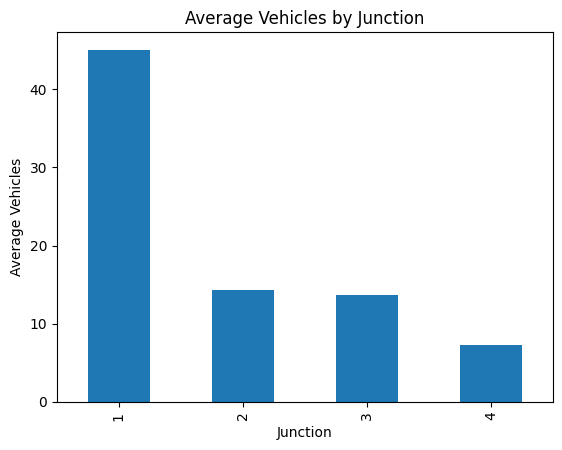

In [ ]:
import matplotlib.pyplot as plt
data.groupby('Junction')['Vehicles'].mean().plot(kind='bar')
plt.xlabel('Junction')
plt.ylabel('Average Vehicles')
plt.title('Average Vehicles by Junction')
plt.show()

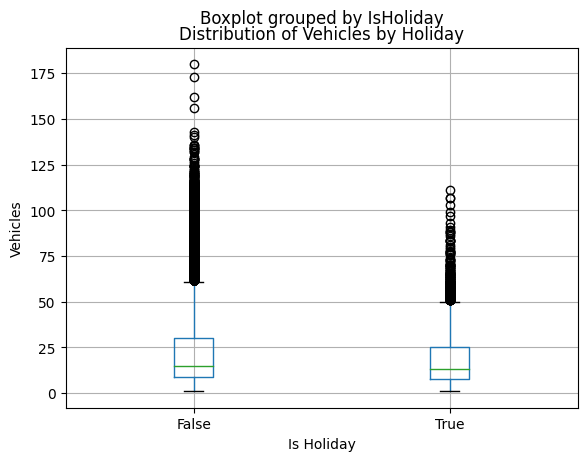

In [ ]:
data.boxplot(column='Vehicles', by='IsHoliday')
plt.xlabel('Is Holiday')
plt.ylabel('Vehicles')
plt.title('Distribution of Vehicles by Holiday')
plt.show()

In [ ]:
data['PreviousDayVehicles'] = data['Vehicles'].shift(24)
data['PreviousHourVehicles'] = data['Vehicles'].shift(1)
data

,DateTime,Junction,Vehicles,ID,Date,Time,Month,Year,DayOfWeek,IsHoliday,PreviousDayVehicles,PreviousHourVehicles
0,2015-11-01 00:00:00,1,15,20151101001,2015-11-01,00:00:00,11,1970-01-01 00:00:00.000002015,6,False,NaN,NaN
1,2015-11-01 01:00:00,1,13,20151101011,2015-11-01,01:00:00,11,1970-01-01 00:00:00.000002015,6,False,NaN,15.0
2,2015-11-01 02:00:00,1,10,20151101021,2015-11-01,02:00:00,11,1970-01-01 00:00:00.000002015,6,False,NaN,13.0
3,2015-11-01 03:00:00,1,7,20151101031,2015-11-01,03:00:00,11,1970-01-01 00:00:00.000002015,6,False,NaN,10.0
4,2015-11-01 04:00:00,1,9,20151101041,2015-11-01,04:00:00,11,1970-01-01 00:00:00.000002015,6,False,NaN,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...
48115,2017-06-30 19:00:00,4,11,20170630194,2017-06-30,19:00:00,6,1970-01-01 00:00:00.000002017,4,False,9.0,17.0
48116,2017-06-30 20:00:00,4,30,20170630204,2017-06-30,20:00:00,6,1970-01-01 00:00:00.000002017,4,False,13.0,11.0
48117,2017-06-30 21:00:00,4,16,20170630214,2017-06-30,21:00:00,6,1970-01-01 00:00:00.000002017,4,False,12.0,30.0
48118,2017-06-30 22:00:00,4,22,20170630224,2017-06-30,22:00:00,6,1970-01-01 00:00:00.000002017,4,False,15.0,16.0


In [ ]:
data.isnull().sum()

DateTime                 0
Junction                 0
Vehicles                 0
ID                       0
Date                     0
Time                     0
Month                    0
Year                     0
DayOfWeek                0
IsHoliday                0
PreviousDayVehicles     24
PreviousHourVehicles     1
dtype: int64

In [ ]:
data['PreviousDayVehicles'].fillna(0,inplace = True)
data['PreviousHourVehicles'].fillna(0,inplace = True)
data.head()

,DateTime,Junction,Vehicles,ID,Date,Time,Month,Year,DayOfWeek,IsHoliday,PreviousDayVehicles,PreviousHourVehicles
0,2015-11-01 00:00:00,1,15,20151101001,2015-11-01,00:00:00,11,1970-01-01 00:00:00.000002015,6,False,0.0,0.0
1,2015-11-01 01:00:00,1,13,20151101011,2015-11-01,01:00:00,11,1970-01-01 00:00:00.000002015,6,False,0.0,15.0
2,2015-11-01 02:00:00,1,10,20151101021,2015-11-01,02:00:00,11,1970-01-01 00:00:00.000002015,6,False,0.0,13.0
3,2015-11-01 03:00:00,1,7,20151101031,2015-11-01,03:00:00,11,1970-01-01 00:00:00.000002015,6,False,0.0,10.0
4,2015-11-01 04:00:00,1,9,20151101041,2015-11-01,04:00:00,11,1970-01-01 00:00:00.000002015,6,False,0.0,7.0


In [ ]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(data, test_size=0.2, shuffle=False)

# Printing the sizes of the training and testing sets
print(f"Training set size: {len(train_data)}")
print(f"Testing set size: {len(test_data)}")

Training set size: 38496
Testing set size: 9624


In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(target.index, target.values, label='Historical Traffic', color='b')
plt.plot(train_forecast_data.index, train_forecast_data['Vehicles'], label='Forecasted Traffic', color='r')
plt.xlabel('Time')
plt.ylabel('Traffic (Vehicles)')
plt.title('Historical and Forecasted Traffic Patterns for the Training Set')
plt.legend()
plt.show()

NameError: name 'target' is not defined

<Figure size 1200x600 with 0 Axes>

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Converting 'Vehicles' column to float
data['Vehicles'] = data['Vehicles'].astype(float)

# Normalizing 'Vehicles' column using MinMaxScaler
scaler = MinMaxScaler()
data[['Vehicles']] = scaler.fit_transform(data[['Vehicles']])

In [ ]:
data.dtypes

DateTime                datetime64[ns]
Junction                         int64
Vehicles                       float64
ID                               int64
Date                    datetime64[ns]
Time                            object
Month                            int32
Year                    datetime64[ns]
DayOfWeek                        int32
IsHoliday                         bool
PreviousDayVehicles            float64
PreviousHourVehicles           float64
dtype: object

In [ ]:
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day
data['Hour'] = data['Date'].dt.hour

# Drop the original 'Date' column since it's no longer needed
data.drop(columns=['Date'], inplace=True)

# Check if all columns are now numeric
print(data.dtypes)

DateTime                datetime64[ns]
Junction                         int64
Vehicles                       float64
ID                               int64
Time                            object
Month                            int32
Year                             int32
DayOfWeek                        int32
IsHoliday                         bool
PreviousDayVehicles            float64
PreviousHourVehicles           float64
Day                              int32
Hour                             int32
dtype: object


In [ ]:
# Convert 'IsHoliday' column to numeric format
data['IsHoliday'] = data['IsHoliday'].astype(int)

Epoch 1/30
962/962 [==============================] - 42s 35ms/step - loss: nan - val_loss: nan
Epoch 2/30
962/962 [==============================] - 35s 36ms/step - loss: nan - val_loss: nan
Epoch 3/30
962/962 [==============================] - 27s 28ms/step - loss: nan - val_loss: nan
Epoch 4/30
962/962 [==============================] - 31s 32ms/step - loss: nan - val_loss: nan
Epoch 5/30
962/962 [==============================] - 27s 28ms/step - loss: nan - val_loss: nan
Epoch 6/30
962/962 [==============================] - 24s 25ms/step - loss: nan - val_loss: nan
Epoch 7/30
962/962 [==============================] - 26s 27ms/step - loss: nan - val_loss: nan
Epoch 8/30
962/962 [==============================] - 27s 28ms/step - loss: nan - val_loss: nan
Epoch 9/30
962/962 [==============================] - 25s 26ms/step - loss: nan - val_loss: nan
Epoch 10/30
962/962 [==============================] - 25s 26ms/step - loss: nan - val_loss: nan
Epoch 11/30
962/962 [==================

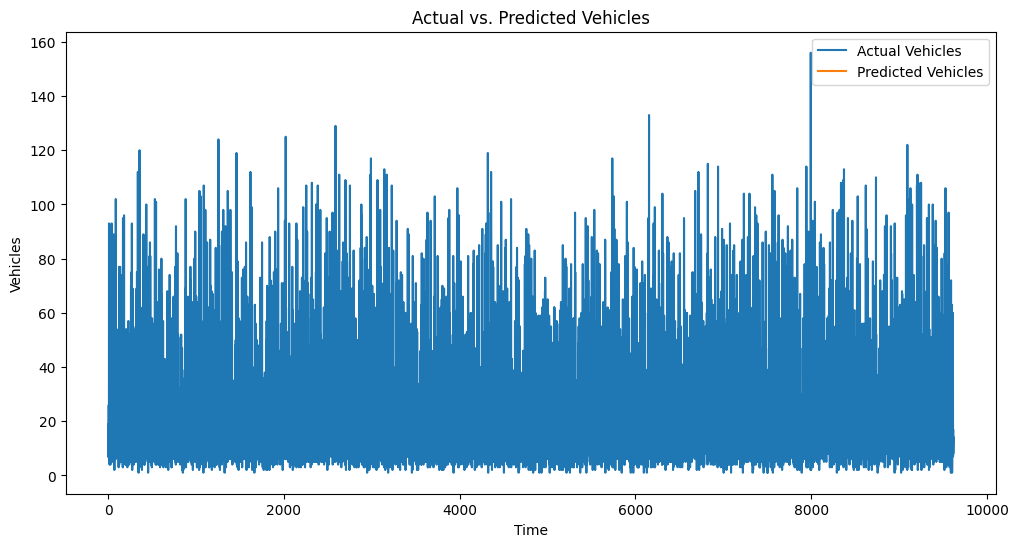

ValueError: Input contains NaN.

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

sequence_length = 24

X_columns = ['Junction', 'Vehicles', 'DayOfWeek', 'Month', 'Year', 'IsHoliday',
             'PreviousDayVehicles', 'PreviousHourVehicles']
y_column = 'Vehicles'

# Splitting the data into input sequences (X) and labels (y)
X = []
y = []

data_array = data.values

data_array = data[X_columns + [y_column]].values

for i in range(len(data_array) - sequence_length):
    X.append(data_array[i:i + sequence_length, :-1])  # Exclude last column
    y.append(data_array[i + sequence_length, -1])  # Last column is target 'Vehicles'

X = np.array(X)
y = np.array(y)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Building the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(units=50))
model.add(Dense(units=1))

# Compiling the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Training the model on the training data
model.fit(X_train, y_train, epochs=30, batch_size=32, validation_split=0.2)
# Evaluation

loss = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")

# Compare with training loss
train_loss = model.evaluate(X_train, y_train)
print(f"Training Loss: {train_loss}")
y_pred = model.predict(X_test)

# Reshaping y_pred to a 2D array with shape (num_samples, 1)
y_pred = y_pred.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)


# Inverse transforming the predicted values to their original scale (if needed)
y_pred_original = scaler.inverse_transform(y_pred)

# Inverse transforming the actual test target values (y_test) to their original scale
y_test_original = scaler.inverse_transform(y_test)
# Visualizing the results:

# Plotting the actual 'Vehicles' values against the predicted values for the test dataset
plt.figure(figsize=(12, 6))
plt.plot(y_test_original, label='Actual Vehicles')
plt.plot(y_pred_original, label='Predicted Vehicles')
plt.xlabel('Time')
plt.ylabel('Vehicles')
plt.title('Actual vs. Predicted Vehicles')
plt.legend()
plt.show()
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y_test_original, y_pred_original)
mse = mean_squared_error(y_test_original, y_pred_original)
rmse = np.sqrt(mse)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)


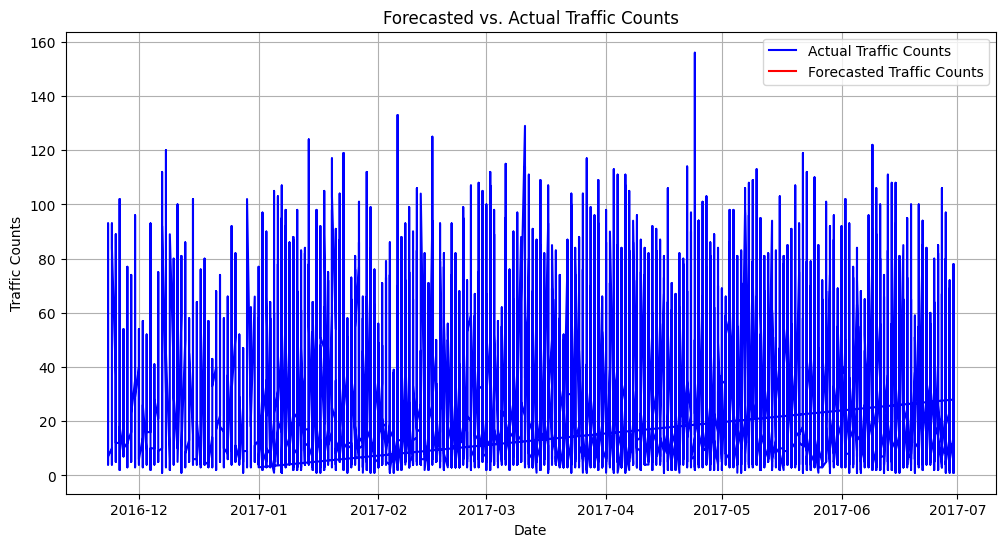

In [ ]:
data['DateTime'] = pd.to_datetime(data[['Year', 'Month', 'Day', 'Hour']])
data.head()
# Getting the timestamp for the test data
test_timestamps = data.iloc[-len(y_test_original):]['DateTime']

# Creating a figure and plot the actual traffic counts
plt.figure(figsize=(12, 6))
plt.plot(test_timestamps, y_test_original, label='Actual Traffic Counts', color='blue')

# Getting the timestamp for the forecasted data
forecasted_timestamps = data.iloc[-len(y_test_original):]['DateTime']

# Plotting the predicted traffic counts for the corresponding time period
plt.plot(forecasted_timestamps, y_pred_original, label='Forecasted Traffic Counts', color='red')

plt.xlabel('Date')
plt.ylabel('Traffic Counts')
plt.title('Forecasted vs. Actual Traffic Counts')
plt.legend()
plt.grid(True)
plt.show()


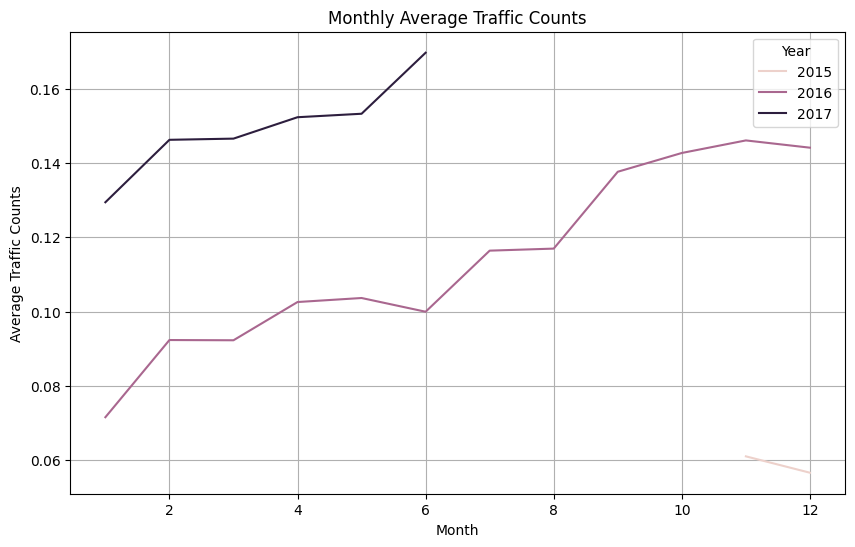

In [ ]:

import seaborn as sns
# Extracting Year and Month from the DateTime column
data['Year'] = data['DateTime'].dt.year
data['Month'] = data['DateTime'].dt.month

# Grouping the data by Year and Month and calculate the average traffic counts for each month
monthly_traffic = data.groupby(['Year', 'Month'])['Vehicles'].mean().reset_index()

# Plotting the average traffic counts by month
plt.figure(figsize=(10, 6))
sns.lineplot(x='Month', y='Vehicles', hue='Year', data=monthly_traffic)
plt.xlabel('Month')
plt.ylabel('Average Traffic Counts')
plt.title('Monthly Average Traffic Counts')
plt.legend(title='Year', loc='upper right')
plt.grid(True)
plt.show()


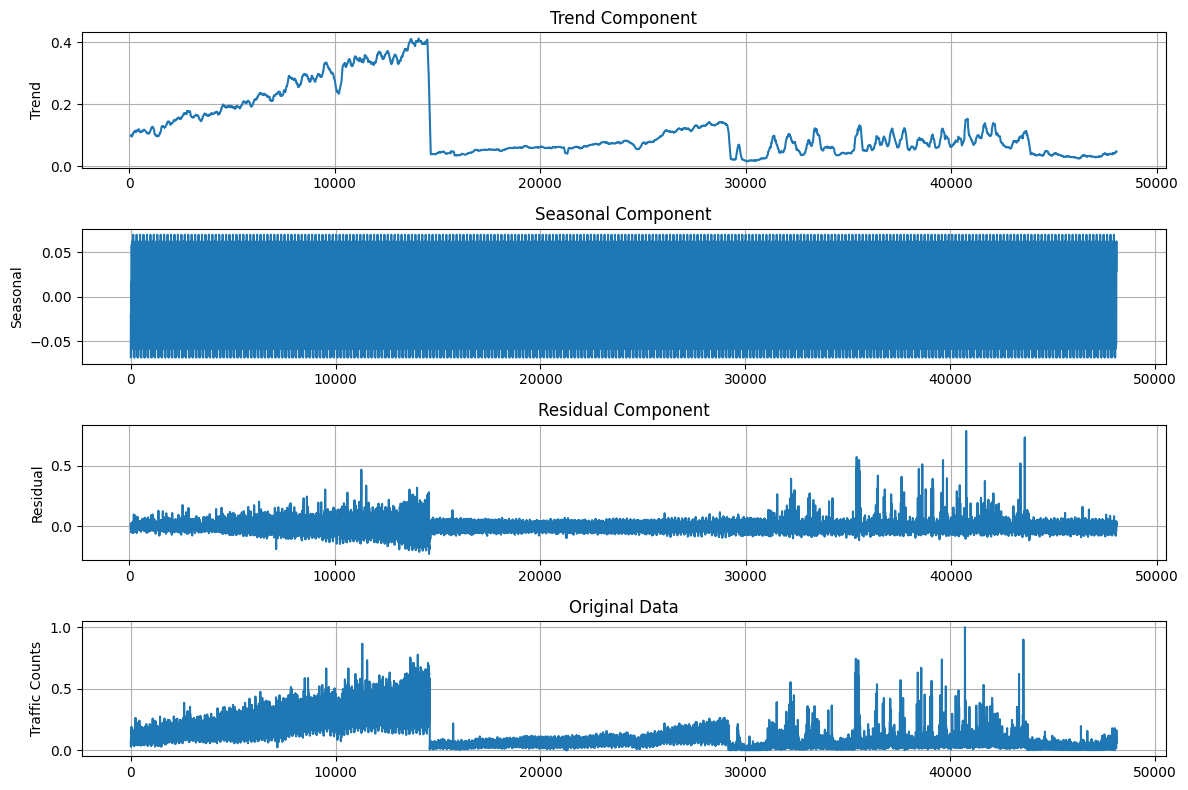

In [ ]:
import statsmodels.api as sm

# Decomposing the time series into trend, seasonal, and residual components
decomposition = sm.tsa.seasonal_decompose(data['Vehicles'], model='additive', period=24*7)  # Assuming a weekly seasonality

# Plotting the components
plt.figure(figsize=(12, 8))
plt.subplot(4, 1, 1)
plt.plot(decomposition.trend)
plt.ylabel('Trend')
plt.title('Trend Component')
plt.grid(True)

plt.subplot(4, 1, 2)
plt.plot(decomposition.seasonal)
plt.ylabel('Seasonal')
plt.title('Seasonal Component')
plt.grid(True)

plt.subplot(4, 1, 3)
plt.plot(decomposition.resid)
plt.ylabel('Residual')
plt.title('Residual Component')
plt.grid(True)

plt.subplot(4, 1, 4)
plt.plot(data['Vehicles'])
plt.ylabel('Traffic Counts')
plt.title('Original Data')
plt.grid(True)

plt.tight_layout()
plt.show()


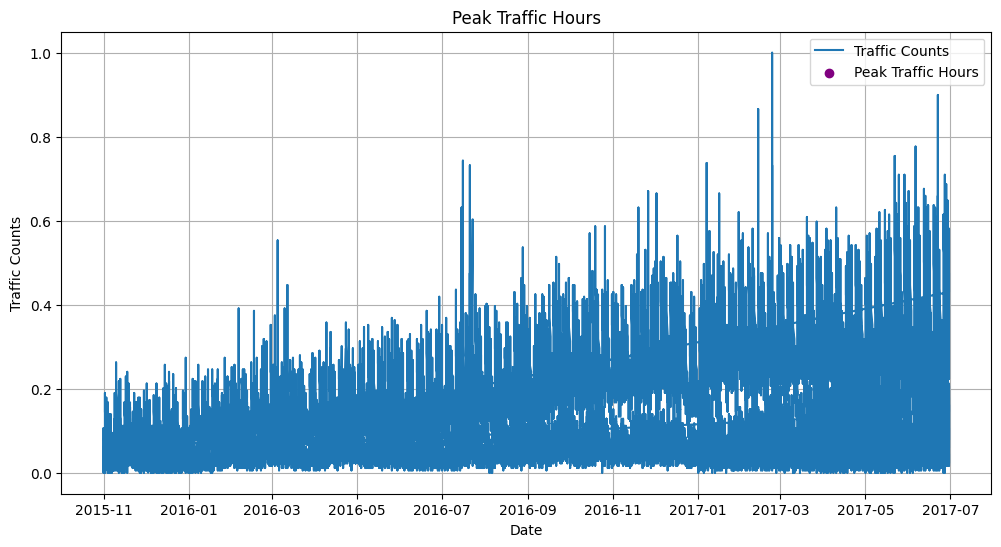

In [ ]:


data['HourOfDay'] = data['DateTime'].dt.hour
data.head()
peak_traffic_hours = data[(data['HourOfDay'] >= 7) & (data['HourOfDay'] <= 10)]  # Assumed peak traffic hours from 7 AM to 10 AM

# Visualize peak traffic hours
plt.figure(figsize=(12, 6))
plt.plot(data['DateTime'], data['Vehicles'], label='Traffic Counts')
plt.scatter(peak_traffic_hours['DateTime'], peak_traffic_hours['Vehicles'], color='purple', label='Peak Traffic Hours')
plt.xlabel('Date')
plt.ylabel('Traffic Counts')
plt.title('Peak Traffic Hours')
plt.legend()
plt.grid(True)
plt.show()